## (Extra) Numpy tricks

Problem: implement 2x2 rolling window for a given 2d array 

In [9]:
import numpy as np

x = np.arange(100).reshape(10, 10)
x.shape, x.strides

((10, 10), (40, 4))

Solution:

In [10]:
a2 = np.lib.stride_tricks.as_strided(x, shape=(9, 9, 2, 2), strides=(40, 4, 40, 4))

In [11]:
print(a2[0, 0])
print(a2[1, 1])

[[ 0  1]
 [10 11]]
[[11 12]
 [21 22]]


Usage: average 2d matrix over 2x2 windows:  

In [12]:
a2.mean(axis=(-2, -1))

array([[ 5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5],
       [15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5],
       [25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5],
       [35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5],
       [45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5],
       [55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5],
       [65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5],
       [75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5],
       [85.5, 86.5, 87.5, 88.5, 89.5, 90.5, 91.5, 92.5, 93.5]])

### Разбор домашнего задания (k-means)

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [14]:
plt.imshow(digits.data[152].reshape(8, 8), cmap='Greys_r')
plt.show()

NameError: name 'plt' is not defined

Здесь была явная реализация без циклов с помощью ```numpy```, но вместо этого рассмотрим,
как пользоваться готовой реализацией из библиотеки ```sklearn```:

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, random_state=1234)
labels = model.fit_predict(data)
centers = model.cluster_centers_

Визуализируем центры кластеров и попробуем дать им интерпретацию:

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 6))
for i, ax in enumerate(axes):
    ax.imshow(centers[i].reshape(8, 8))
    ax.axis('off')

Запомним соответствие номера кластера и цифры, которой отвечает центр этого кластера:

In [ ]:
translate = dict(zip(np.arange(10), [1, 8, 6, 3, 7, 2, 0, 4, 9, 5]))

Трансформируем номера кластеров для всех элементов выборки в цифры:

In [ ]:
new_labels = np.array([translate[i] for i in labels])

Построим матрицу ошибок:

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(digits.target, new_labels)
cm

Визуализация матрицы ошибок:

In [ ]:
fig = plt.figure(figsize=(7, 7))
fig.patch.set_facecolor('xkcd:white')

plt.imshow(cm)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Target', fontsize=16)
plt.xlabel('Prediction', fontsize=16)
plt.colorbar()
plt.show()

На матрице явно выделяется диагональ, это значит, что в кластерах дейсвительно преобладают картинки с каким-то одной цифрой. Исключение - цифра 1, большая часть которых попала в кластер с цифрой 8.

### Разбор домашнего задания (kNN)

Разделим выборку на две части (обучающую и тестовую):

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.3, shuffle=True,
                                                    random_state=123)

Здесь тоже была была явная реализация с помощью numpy, но вместо этого рассмотрим, как пользоваться готовой реализацией из библиотеки sklearn:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Матрица ошибок:

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

Визуализация матрицы ошибок:

In [ ]:
fig = plt.figure(figsize=(7, 7))
fig.patch.set_facecolor('xkcd:white')

plt.imshow(cm)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Target', fontsize=16)
plt.xlabel('Prediction', fontsize=16)
plt.colorbar()
plt.show()

Оценка точности модели (число правильно классифицированных объектов):

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

# Matplotlib

In [ ]:
import matplotlib.pyplot as plt

### Basic charts

![](https://res.cloudinary.com/codecrucks/image/upload/c_scale,w_700,h_327,dpr_2/f_webp,q_auto/v1648958444/chart-types.png?_i=AA)

### Chart selection roadmap

![](http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg)

Из чего состоит график:

![image.png](https://blog.logrocket.com/wp-content/uploads/2021/11/anatomy-figure.png)

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, label='Cos')
plt.plot(X, S, label='Sin', c='r', linestyle='--', linewidth=4)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y')
plt.xticks(fontsize=14)
plt.legend()
plt.show()

# Homework

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')``` and do the following exercises **without for-loops**.


Plot the populations for the years in the period. Add legend and axis labels to the plot.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')

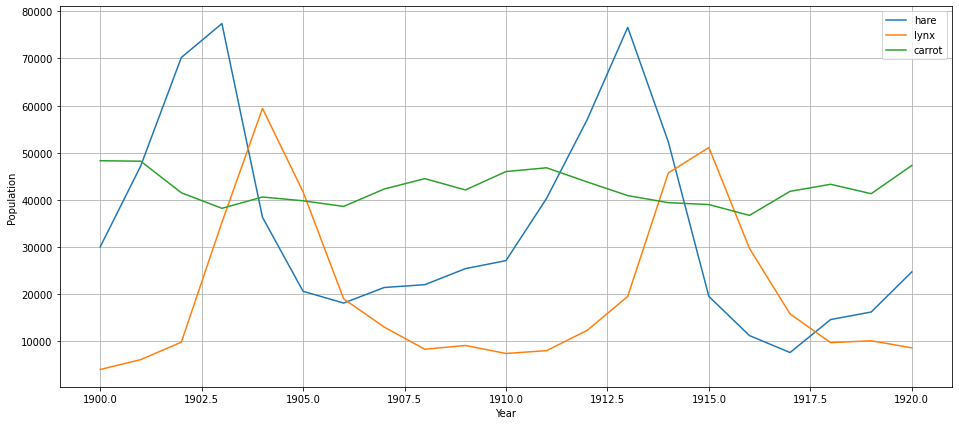

In [4]:
plt.figure(figsize = (16, 7))
plt.plot(df[:, 0], df[:, 1], label = 'hare')
plt.plot(df[:, 0], df[:, 2], label = 'lynx')
plt.plot(df[:, 0], df[:, 3], label = 'carrot')


plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

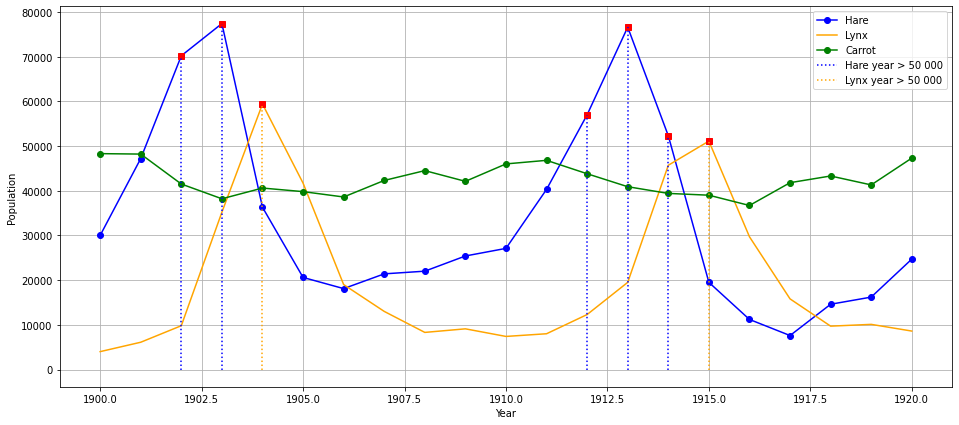

In [5]:
plt.figure(figsize = (16, 7))
hares_ind = np.where(df[:, 1] > 50000)[0]
lynx_ind = np.where(df[:, 2] > 50000)[0]
carrot_ind = np.where(df[:, 3] > 50000)[0]

plt.plot(df[:, 0], df[:, 1], 'bo-', label='Hare')
plt.plot(df[:, 0], df[:, 2], '-', label='Lynx', color = 'orange')
plt.plot(df[:, 0], df[:, 3], 'go-', label='Carrot')

plt.plot(df[hares_ind, 0], df[hares_ind, 1], 's', color = 'red')
plt.plot(df[lynx_ind, 0], df[lynx_ind, 2], 's', color = 'red')


plt.vlines(df[hares_ind, 0], 0, df[hares_ind, 1], linestyles="dotted", label='Hare year > 50 000', color = 'blue')
plt.vlines(df[lynx_ind, 0], 0, df[lynx_ind, 2], linestyles="dotted", label='Lynx year > 50 000', color = 'orange')


plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

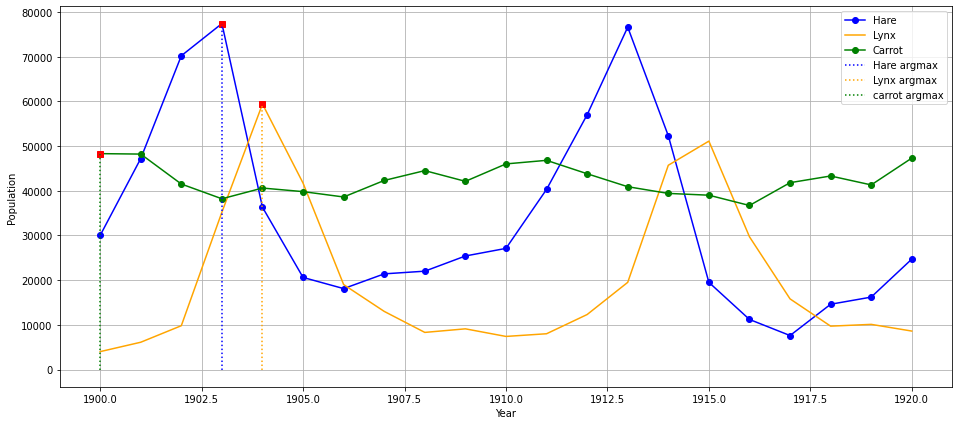

In [6]:
plt.figure(figsize = (16, 7))




hares_argmax = np.argmax(df[:, 1])
lynx_argmax = np.argmax(df[:, 2])
carrot_argmax = np.argmax(df[:, 3])

plt.plot(df[:, 0], df[:, 1], 'bo-', label='Hare')
plt.plot(df[:, 0], df[:, 2], '-', label='Lynx', color = 'orange')
plt.plot(df[:, 0], df[:, 3], 'go-', label='Carrot')

plt.plot(df[hares_argmax, 0], df[hares_argmax, 1], 's', color = 'red')
plt.plot(df[lynx_argmax, 0], df[lynx_argmax, 2], 's', color = 'red')
plt.plot(df[carrot_argmax, 0], df[carrot_argmax, 3], 's', color = 'red')

plt.vlines(df[hares_argmax, 0], 0, df[hares_argmax, 1], linestyles="dotted", label='Hare argmax', color = 'blue')
plt.vlines(df[lynx_argmax, 0], 0, df[lynx_argmax, 2], linestyles="dotted", label='Lynx argmax', color = 'orange')
plt.vlines(df[carrot_argmax, 0], 0, df[carrot_argmax, 3], linestyles="dotted", label='carrot argmax', color = 'green')


plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

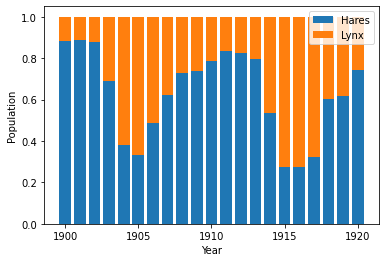

In [7]:


plt.bar(df[:,0], df[:, 1]/(df[:, 1]+df[:, 2]), label = 'Hares')
plt.bar(df[:,0], df[:, 2]/(df[:, 1]+df[:, 2]), bottom = df[:, 1]/(df[:, 1]+df[:, 2]), label = 'Lynx')



plt.xlabel("Year")
plt.ylabel("Population")

plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

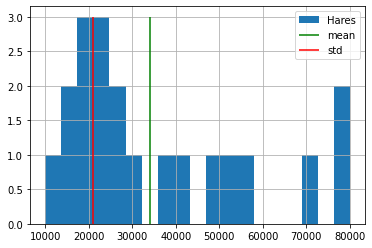

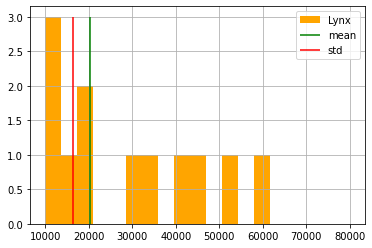

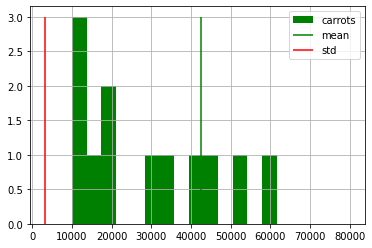

In [19]:
Hares_mean = np.mean(df[:, 1])
Lynx_mean = np.mean(df[:, 2])
carrot_mean = np.mean(df[:, 3])

Hares_std = np.std(df[:, 1])
Lynx_std = np.std(df[:, 2])
carrot_std = np.std(df[:, 3])


plt.hist(df[:, 1], bins = np.linspace(10000, 80000, 20), label = 'Hares')
plt.vlines(Hares_mean, 0, 3, color = 'green', label = 'mean')
plt.vlines(Hares_std, 0, 3, color = 'red', label = 'std')
plt.grid()
plt.legend()
plt.show()


plt.hist(df[:, 2], bins = np.linspace(10000, 80000, 20), color = 'orange', label = 'Lynx')
plt.vlines(Lynx_mean, 0, 3, color = 'green', label = 'mean')
plt.vlines(Lynx_std, 0, 3, color = 'red', label = 'std')
plt.grid()
plt.legend()
plt.show()

plt.hist(df[:, 2], bins = np.linspace(10000, 80000, 20), color = 'green', label = 'carrots')
plt.vlines(carrot_mean, 0, 3, color = 'green', label = 'mean')
plt.vlines(carrot_std, 0, 3, color = 'red', label = 'std')
plt.grid()
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

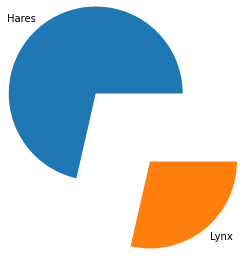

In [9]:
pop = np.array(['H', 'L'])[np.apply_along_axis(lambda x: np.argmax(x[1:3]), 1, df)]
a = len(pop[pop == 'H'])
b = len(pop[pop == 'L'])
plt.pie([a, b], labels = ['Hares', 'Lynx'], explode = [a/(a+b), b/(a+b)])
plt.show()

Plot the change in the hare population and the number of lynxes. Find the correlation coefficient.

In [10]:
dif = df[1:, 1] - df[:len(df) - 1, 1]

np.corrcoef(dif, df[1:, 2])[0, 1]

-0.8494801603656876

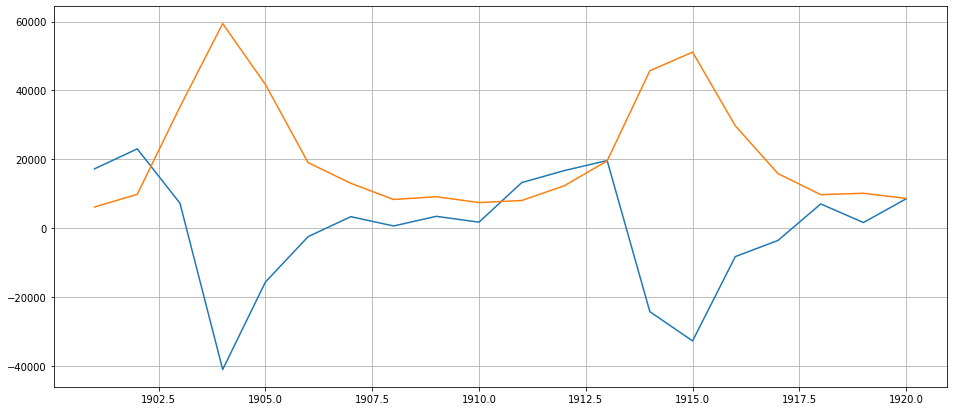

In [11]:
plt.figure(figsize = (16, 7))
plt.plot(df[1:,0], dif)
plt.plot(df[1:, 0], df[1:, 2])


plt.grid()
plt.show()

Using a scatter plot, show the population of hares vs carrots and hares vs lynxes by year on two separate subplots (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

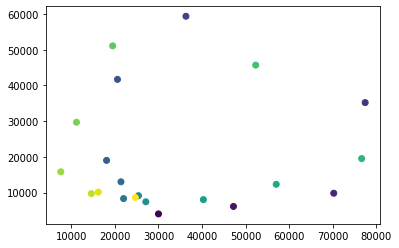

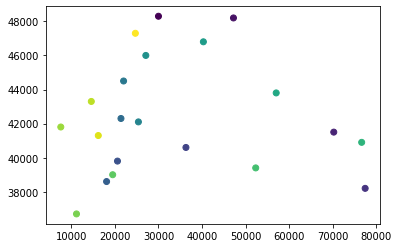

In [12]:
plt.scatter(df[:, 1], df[:,2], c = df[:, 0])
plt.show()
plt.scatter(df[:, 1], df[:,3], c = df[:, 0])
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [21]:
df

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

Если присмотреться к графику (см.ниже), то есть некая циклическая тенденция.
Сначала популяция кроликов немного превосходит популяции рысей, но затем происходит резкое уевелечение популяции рысей (они питаются и прокармливают детёнышей) и резкое уменьшение популяции зайцев. Затем популяция рысей идёт на спад, так как зайцев мало, затем ситуация уравнивается и всё повторяется. В 1920 году популяции сохранятся в уравновешанном состоянии, поэтому популяция будет почти такая же в 1907-1910 годах 

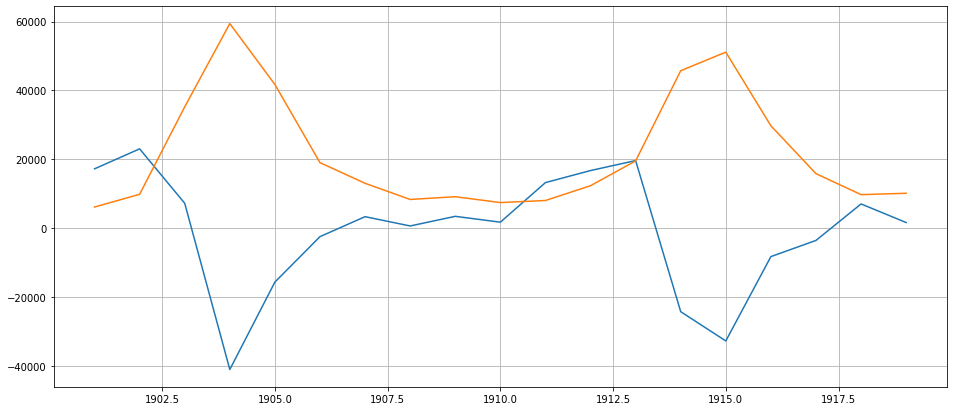

In [27]:
plt.figure(figsize = (16, 7))
plt.plot(df[1:20,0], dif[:len(dif) - 1])
plt.plot(df[1:20, 0], df[1:20, 2])


plt.grid()
plt.show()

In [35]:
s = np.mean(df[7:11, 1])

23975.0